In [167]:
from pytesseract import pytesseract as pt
from skimage.io import imread, imshow
import numpy as np
import json
import requests
import urllib
from io import StringIO
from PIL import Image
import cv2
from collections import Counter
import matplotlib.pyplot as plt
from time import sleep

In [2]:
# load image links as json
with open('image_links.json', 'r') as f:
    links = json.load(f)

links = np.array(links)

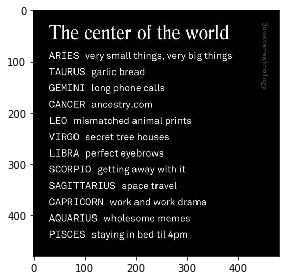

In [108]:
config = ('-l eng --oem 1 --psm 3')
image = Image.open(urllib.request.urlopen(links[14]))
image_data = np.array(image)
invert = cv2.bitwise_not(image_data)
text = pt.image_to_string(invert, lang = 'eng')
imshow(image_data)


In [142]:
text.split("\n")

['What they’re doing while on the',
 'phone with you',
 '',
 'ARIES Running a 5k',
 '',
 'TAURUS Strolling around the apartment to sit in different rooms.',
 'GEMINI Editing a Wikipedia article',
 '',
 "CANCER Wondering if your tone means you're mad at them",
 '',
 'LEO Facetuning pictures from a party last weekend',
 '',
 'VIRGO Taking notes so they can thoughtfully follow up later',
 'LIBRA Idly swiping through Tinder',
 '',
 "SCORPIO Wiretapping you to make sure you're not wiretapping them",
 'SAG Tuning you out so they can hear their own internal monologue',
 'CAP Rolling their eyes as you vent about the same thing again',
 'AQUARIUS Doing a handstand against the wall',
 '',
 'PISCES Imagining what life would be like as a cat',
 '\x0c']

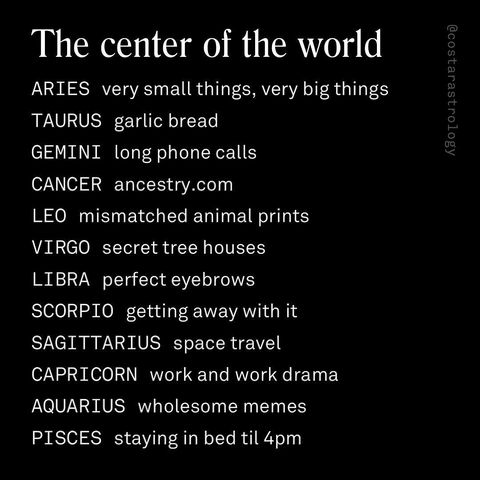

In [47]:
black = Image.open(urllib.request.urlopen(links[14]))
black

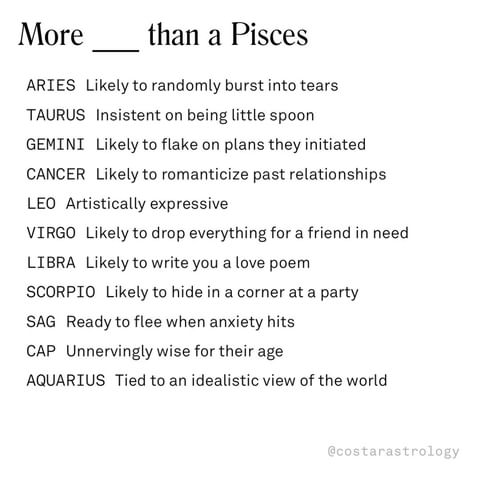

In [48]:
white = Image.open(urllib.request.urlopen(links[140]))
white

In [164]:
d = np.array(white)
d = d.flatten()[:50]
if all([val for val in d]): print('White')

def is_white(image):
    image = image.flatten()[:50]
    return all([val for val in image])

def extract_text(url):
    # load the image and image data
    image = Image.open(urllib.request.urlopen(url))
    image_data = np.array(image)

    # check to see if the image needs to be inverted
    # for some reaseon the text extraction step only works properly if the images are mostly white backgrounds
    if not is_white(image_data):
        # print("Converting image to white")
        image_data = cv2.bitwise_not(image_data)
    
    # imshow(image_data)
    # plt.show()
    
    return pt.image_to_string(image_data, lang = 'eng')

        
    


White


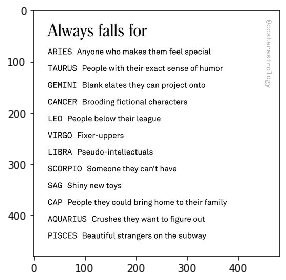

Always falls for

ARIES Anyone who makes them feel special
TAURUS People with their exact sense of humor
GEMINI Blank slates they can project onto
CANCER Brooding fictional characters

LEO People below their league

VIRGO Fixer-uppers

LIBRA Pseudo-intellectuals

SCORPIO Someone they can't have

SAG Shiny new toys

CAP People they could bring home to their family
AQUARIUS Crushes they want to figure out

PISCES Beautiful strangers on the subway



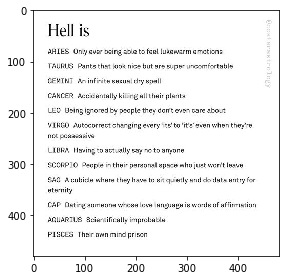

Hell is

ARIES Only ever being able to feel lukewarm emotions
TAURUS Pants that look nice but are super uncomfortable
GEMINI An infinite sexual dry spell

CANCER Accidentally killing all their plants

LEO Being ignored by people they don't even care about

VIRGO Autocorrect changing every ‘its’ to ‘it's’ even when they're
not possessive

LIBRA Having to actually say no to anyone
SCORPIO People in their personal space who just won't leave

SAG Acubicle where they have to sit quietly and do data entry for
eternity

CAP Dating someone whose love language is words of affirmation
AQUARIUS Scientifically improbable

PISCES Their own mind prison



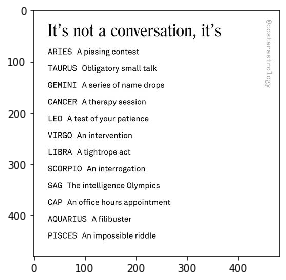

It’s not a conversation, it’s
ARIES A pissing contest
TAURUS Obligatory small talk
GEMINI A series of name drops
CANCER A therapy session

LEO A test of your patience
VIRGO An intervention

LIBRA A tightrope act

SCORPIO An interrogation

SAG The intelligence Olympics
CAP An office hours appointment.
AQUARIUS A filibuster

PISCES An impossible riddle



In [161]:
for link in links[:3]:
    text = extract_text(link)
    print(text)
    

In [145]:
signs = ("ARIES", "TAURUS", "GEMINI", "CANCER", "LEO", "VIRGO", "LIBRA", "SCORPIO", "SAG", "CAP", "AQUARIUS", "PISCES")

In [210]:
def is_response(line):
    '''returns a boolean value based on if the line is a response or not'''
    if line.startswith(signs): return True
    else: return False


def create_dictionary(text):
    text = text.split("\n")[:-1]
    card = {
        'prompt': "",
        'responses': [

        ]
    }

    for line in text:
        print(line)
        response_found = False
        # convert the line into a list of tokens
        tokens = line.split()
        # add the prompt to the card
        if not is_response(line) and response_found:
            card['prompt'] += f" {line}"
            
        # collect the responses for each zodiac
        else:
            response_found = True
            # get the sign that made the response
            zodiac = tokens[0]
            response = " ".join(tokens[1:])
            pair = {
                'zodiac': zodiac,
                'response': response
            }

            card["responses"].append(pair)            
            
    return card

create_dictionary(text)
    

Bad habits

ARIES Spewing whatever pops into their head with zero
forethought

TAURUS Making the tiniest inconvenience sound like the end of the
world

GEMINI Embellishing the truth to make the story more interesting
CANCER Getting defensive at the slightest criticism

LEO Spending money that they don’t have

VIRGO Sounding condescending without even trying

LIBRA Buying beautiful but useless objects

SCORPIO Telling little white lies just because they know they can
SAG Offering opinions where they have no authority

CAP Humblebragging about how busy they are

AQUARIUS Collecting personality traits from other people
PISCES Making people fall in love with them and then bailing


{'prompt': ' Bad habits  forethought  world       ',
 'responses': [{'zodiac': 'ARIES',
   'response': 'Spewing whatever pops into their head with zero'},
  {'zodiac': 'TAURUS',
   'response': 'Making the tiniest inconvenience sound like the end of the'},
  {'zodiac': 'GEMINI',
   'response': 'Embellishing the truth to make the story more interesting'},
  {'zodiac': 'CANCER',
   'response': 'Getting defensive at the slightest criticism'},
  {'zodiac': 'LEO', 'response': 'Spending money that they don’t have'},
  {'zodiac': 'VIRGO',
   'response': 'Sounding condescending without even trying'},
  {'zodiac': 'LIBRA', 'response': 'Buying beautiful but useless objects'},
  {'zodiac': 'SCORPIO',
   'response': 'Telling little white lies just because they know they can'},
  {'zodiac': 'SAG',
   'response': 'Offering opinions where they have no authority'},
  {'zodiac': 'CAP', 'response': 'Humblebragging about how busy they are'},
  {'zodiac': 'AQUARIUS',
   'response': 'Collecting personality 

'Bad habits\n\nARIES Spewing whatever pops into their head with zero\nforethought\n\nTAURUS Making the tiniest inconvenience sound like the end of the\nworld\n\nGEMINI Embellishing the truth to make the story more interesting\nCANCER Getting defensive at the slightest criticism\n\nLEO Spending money that they don’t have\n\nVIRGO Sounding condescending without even trying\n\nLIBRA Buying beautiful but useless objects\n\nSCORPIO Telling little white lies just because they know they can\nSAG Offering opinions where they have no authority\n\nCAP Humblebragging about how busy they are\n\nAQUARIUS Collecting personality traits from other people\nPISCES Making people fall in love with them and then bailing\n\x0c'

In [170]:
game_data = []
for count, link in enumerate(links):
    # if len(game_data) % 100 == 0:
    #     print(f"Collected {len(game_data)} cards, sleeping for 5 seconds")
    #     sleep(5)

    try:
        text = extract_text(link)
        card = create_dictionary(text)
    except AttributeError as err:
        print(f"Skipping image because {err}")
    except Exception as e:
        raise e

    game_data.append(card)
    print(f"{len(game_data)}")
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Skipping image because 'NoneType' object has no attribute 'timeout'
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260


In [171]:
len(game_data)

639

In [199]:
with open('game_data.json', 'w') as f:
    json.dump(game_data, f, indent=2)

In [205]:
[x for x in game_data[0]['responses']]

["{'zodiac': 'ARIES', 'response': 'Anyone who makes them feel special'}",
 "{'zodiac': 'TAURUS', 'response': 'People with their exact sense of humor'}",
 "{'zodiac': 'GEMINI', 'response': 'Blank slates they can project onto'}",
 "{'zodiac': 'CANCER', 'response': 'Brooding fictional characters'}",
 "{'zodiac': 'LEO', 'response': 'People below their league'}",
 "{'zodiac': 'VIRGO', 'response': 'Fixer-uppers'}",
 "{'zodiac': 'LIBRA', 'response': 'Pseudo-intellectuals'}",
 '{\'zodiac\': \'SCORPIO\', \'response\': "Someone they can\'t have"}',
 "{'zodiac': 'SAG', 'response': 'Shiny new toys'}",
 "{'zodiac': 'CAP', 'response': 'People they could bring home to their family'}",
 "{'zodiac': 'AQUARIUS', 'response': 'Crushes they want to figure out'}",
 "{'zodiac': 'PISCES', 'response': 'Beautiful strangers on the subway'}"]

In [185]:
str("Needs the freedom to just \u201cdo them\u201d")

'Needs the freedom to just “do them”'

In [193]:
for count, card in enumerate(game_data):

    for number, response in enumerate(card['responses']):
        # print(response)
        game_data[count]['responses'][number] = str(response)

In [197]:
print(json.dumps(game_data, indent = 2, ensure_ascii = True))

[
  {
    "prompt": "Always falls for",
    "responses": [
      "{'zodiac': 'ARIES', 'response': 'Anyone who makes them feel special'}",
      "{'zodiac': 'TAURUS', 'response': 'People with their exact sense of humor'}",
      "{'zodiac': 'GEMINI', 'response': 'Blank slates they can project onto'}",
      "{'zodiac': 'CANCER', 'response': 'Brooding fictional characters'}",
      "{'zodiac': 'LEO', 'response': 'People below their league'}",
      "{'zodiac': 'VIRGO', 'response': 'Fixer-uppers'}",
      "{'zodiac': 'LIBRA', 'response': 'Pseudo-intellectuals'}",
      "{'zodiac': 'SCORPIO', 'response': \"Someone they can't have\"}",
      "{'zodiac': 'SAG', 'response': 'Shiny new toys'}",
      "{'zodiac': 'CAP', 'response': 'People they could bring home to their family'}",
      "{'zodiac': 'AQUARIUS', 'response': 'Crushes they want to figure out'}",
      "{'zodiac': 'PISCES', 'response': 'Beautiful strangers on the subway'}"
    ]
  },
  {
    "prompt": "Hell isnot possessiveeternity"